In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
import requests
%matplotlib inline

In [2]:
df=pd.read_excel('C:\\Users\\nafissaad\Downloads\\Spreadsheets-20231017T124722Z-001\\Spreadsheets\\NEDL_Hedges_Safe_Havens.xlsx')
df=df[df.columns[:8]]
df.columns=df[:1].values[0][:8]
df.index=df.Date
df=df[1:]
df=df.dropna()
df.drop(columns='Date',inplace=True)
df

,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate
Date,,,,,,,
2010-10-14,1173.810059,13.5,24.030001,170.539993,87.461609,77.576225,36.531868
2010-10-15,1176.189941,13.38,23.75,169.039993,87.442543,76.628494,36.484917
2010-10-18,1184.709961,13.44,23.959999,168.929993,87.461609,77.247551,36.954472
2010-10-19,1165.900024,13.04,22.84,165.559998,87.442543,77.713737,36.498318
2010-10-20,1178.170044,13.14,23.33,167.440002,87.442543,77.881905,37.296577
...,...,...,...,...,...,...,...
2020-10-02,3348.419922,18.129999,22.129999,82.599998,91.519997,162.75,81.93
2020-10-05,3408.600098,18.24,22.620001,84.360001,91.519997,159.570007,82.400002
2020-10-06,3360.969971,18,21.73,80.730003,91.529999,160.429993,81.860001


In [3]:
returns=df.pct_change().dropna()
returns

,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate
Date,,,,,,,
2010-10-15,0.002027,-0.008889,-0.011652,-0.008796,-0.000218,-0.012217,-0.001285
2010-10-18,0.007244,0.004484,0.008842,-0.000651,0.000218,0.008079,0.012870
2010-10-19,-0.015877,-0.029762,-0.046745,-0.019949,-0.000218,0.006035,-0.012344
2010-10-20,0.010524,0.007669,0.021454,0.011355,0.000000,0.002164,0.021871
2010-10-21,0.001774,-0.012938,-0.031719,-0.002508,0.000000,-0.011874,-0.001079
...,...,...,...,...,...,...,...
2020-10-02,-0.009578,-0.000551,0.001811,-0.025254,0.000000,-0.003734,0.017258
2020-10-05,0.017973,0.006067,0.022142,0.021308,0.000000,-0.019539,0.005737
2020-10-06,-0.013974,-0.013158,-0.039346,-0.043030,0.000109,0.005389,-0.006553


In [4]:
randked_return=pd.DataFrame(index=returns.index)
for i in df.columns:
    randked_return[i]=returns[i].sort_values(ascending=True).values
randked_return=randked_return.dropna()

In [5]:
randked_return['Percentile']=[i/len(randked_return) for i in range(1,len(randked_return)+1)]
returns['Percentile']=[i/len(randked_return) for i in range(1,len(randked_return)+1)]
returns

,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate,Percentile
Date,,,,,,,,
2010-10-15,0.002027,-0.008889,-0.011652,-0.008796,-0.000218,-0.012217,-0.001285,0.000398
2010-10-18,0.007244,0.004484,0.008842,-0.000651,0.000218,0.008079,0.012870,0.000796
2010-10-19,-0.015877,-0.029762,-0.046745,-0.019949,-0.000218,0.006035,-0.012344,0.001194
2010-10-20,0.010524,0.007669,0.021454,0.011355,0.000000,0.002164,0.021871,0.001592
2010-10-21,0.001774,-0.012938,-0.031719,-0.002508,0.000000,-0.011874,-0.001079,0.001990
...,...,...,...,...,...,...,...,...
2020-10-02,-0.009578,-0.000551,0.001811,-0.025254,0.000000,-0.003734,0.017258,0.998408
2020-10-05,0.017973,0.006067,0.022142,0.021308,0.000000,-0.019539,0.005737,0.998806
2020-10-06,-0.013974,-0.013158,-0.039346,-0.043030,0.000109,0.005389,-0.006553,0.999204


In [6]:
returns[randked_return.columns[:-1]].corr()

,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate
SP500,1.000000,0.008750,0.188929,0.314362,-0.022010,-0.466206,0.766399
Gold,0.008750,1.000000,0.791968,0.640759,-0.015818,0.222265,0.084887
Silver,0.188929,0.791968,1.000000,0.675459,-0.028964,0.043411,0.205547
Platinum,0.314362,0.640759,0.675459,1.000000,-0.009042,-0.025709,0.291631
Bills,-0.022010,-0.015818,-0.028964,-0.009042,1.000000,0.034734,-0.030111
Bonds,-0.466206,0.222265,0.043411,-0.025709,0.034734,1.000000,-0.218559
Real Estate,0.766399,0.084887,0.205547,0.291631,-0.030111,-0.218559,1.000000


In [7]:
Conditional_Corr=pd.DataFrame(columns=[returns.columns],index=[[i/100 for i in [0,1,5,10,20,30,40,50,60,70,80,90,95,99]],[i/100 for i in [1,5,10,20,30,40,50,60,70,80,90,95,99,100]]])
Conditional_Corr

,,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate,Percentile
0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.10,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.30,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.40,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.50,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.60,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.70,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
returns['SP500'].quantile(0.0)

-0.11984055248695646

In [9]:
returns['SP500'].quantile(0.01)

-0.031732581529292155

In [10]:
x=[returns.loc[i,'SP500'] if returns.loc[i,'SP500']>=returns['SP500'].quantile(0.01) and returns.loc[i,'SP500']<returns['SP500'].quantile(0.05) else 0 for i in returns['SP500'].index]

In [11]:
y=[returns.loc[i,'Platinum'] if returns.loc[i,'SP500']>=returns['SP500'].quantile(0.01) and returns.loc[i,'SP500']<returns['SP500'].quantile(0.05) else 0 for i in returns['SP500'].index]

In [12]:
np.corrcoef(x,y)

array([[1.        , 0.38174527],
       [0.38174527, 1.        ]])

In [13]:
for m in Conditional_Corr.index:
    for j in df.columns:
        Conditional_Corr.loc[m,j]=np.corrcoef([returns.loc[i,'SP500'] if returns.loc[i,'SP500']>=returns['SP500'].quantile(m[0]) and returns.loc[i,'SP500']<returns['SP500'].quantile(m[1]) else 0 for i in returns['SP500'].index],
                                              [returns.loc[i,j] if returns.loc[i,'SP500']>=returns['SP500'].quantile(m[0]) and returns.loc[i,'SP500']<returns['SP500'].quantile(m[1]) else 0 for i in returns['SP500'].index])[0][1]
        print(Conditional_Corr.loc[m,j])
        

SP500    1.0
Name: (0.0, 0.01), dtype: object
Gold   -0.002057
Name: (0.0, 0.01), dtype: object
Silver    0.544702
Name: (0.0, 0.01), dtype: object
Platinum    0.72131
Name: (0.0, 0.01), dtype: object
Bills   -0.140612
Name: (0.0, 0.01), dtype: object
Bonds   -0.567788
Name: (0.0, 0.01), dtype: object
Real Estate    0.943222
Name: (0.0, 0.01), dtype: object
SP500    1.0
Name: (0.01, 0.05), dtype: object
Gold   -0.097367
Name: (0.01, 0.05), dtype: object
Silver    0.190283
Name: (0.01, 0.05), dtype: object
Platinum    0.381745
Name: (0.01, 0.05), dtype: object
Bills   -0.203681
Name: (0.01, 0.05), dtype: object
Bonds   -0.737802
Name: (0.01, 0.05), dtype: object
Real Estate    0.810961
Name: (0.01, 0.05), dtype: object
SP500    1.0
Name: (0.05, 0.1), dtype: object
Gold    0.014067
Name: (0.05, 0.1), dtype: object
Silver    0.215325
Name: (0.05, 0.1), dtype: object
Platinum    0.327715
Name: (0.05, 0.1), dtype: object
Bills   -0.130458
Name: (0.05, 0.1), dtype: object
Bonds   -0.559456
N

In [14]:
Conditional_Corr

,,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate,Percentile
0.00,0.01,1.0,-0.002057,0.544702,0.72131,-0.140612,-0.567788,0.943222,NaN
0.01,0.05,1.0,-0.097367,0.190283,0.381745,-0.203681,-0.737802,0.810961,NaN
0.05,0.10,1.0,0.014067,0.215325,0.327715,-0.130458,-0.559456,0.761765,NaN
0.10,0.20,1.0,0.040358,0.171815,0.272612,-0.092876,-0.35084,0.514205,NaN
0.20,0.30,1.0,0.052088,0.13995,0.139912,-0.040373,-0.299737,0.314796,NaN
0.30,0.40,1.0,-0.016199,0.02141,0.070061,-0.051337,-0.084403,0.144562,NaN
0.40,0.50,1.0,-0.065381,-0.03549,0.033178,-0.068273,-0.01976,0.009356,NaN
0.50,0.60,1.0,0.051589,0.076296,0.053532,0.241366,-0.092427,0.214745,NaN
0.60,0.70,1.0,0.172289,0.267329,0.187557,0.240445,-0.148408,0.324691,NaN
0.70,0.80,1.0,-0.03487,0.070492,0.097938,0.077215,-0.168896,0.466011,NaN


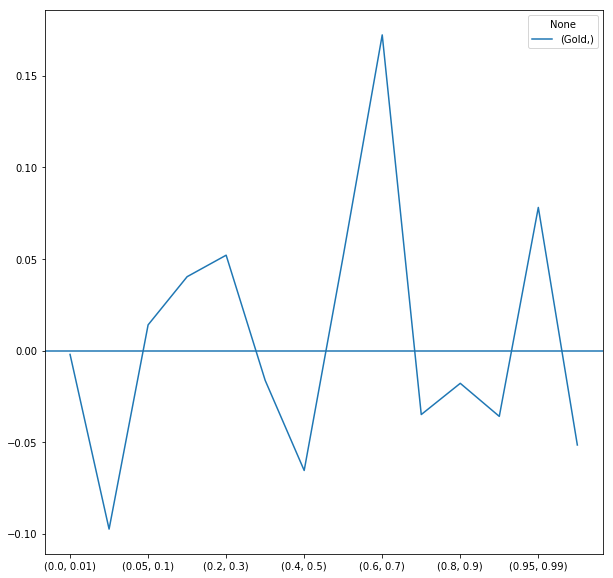

In [15]:
Conditional_Corr['Gold'].plot(figsize=(10,10))
plt.axhline(0)